# Multimedia Security and Privacy
## TP4
Tientso Ning

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

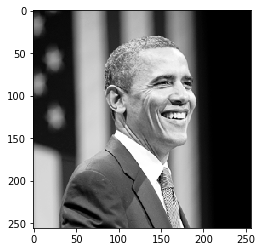

In [2]:
#import liftingbody
img = cv2.imread("./obama.PNG", 0)
plt.imshow(img, cmap="Greys_r")

In [3]:
#uniform distributed -1,1
w_ = np.random.randint(0,2,(img.shape))
w_[w_ < 1] = -1

In [4]:
#random sampling for N
q_ = np.copy(w_).flatten()
for i in range(0,len(q_)):
    roll = np.random.random()
    if roll < 0.5:
        q_[i] = 0
q_ = np.reshape(q_, w_.shape)
w_ = q_

In [5]:
#embed the watermark w into host image x to create watermarked image y
y = img + w_

In [6]:
#generate matrix z with AWGN
z = np.random.random((y.shape))

In [7]:
#add the noise z to image y to create attacked image v
v = y + z

Text(0.5, 1.0, 'Attacked Image')

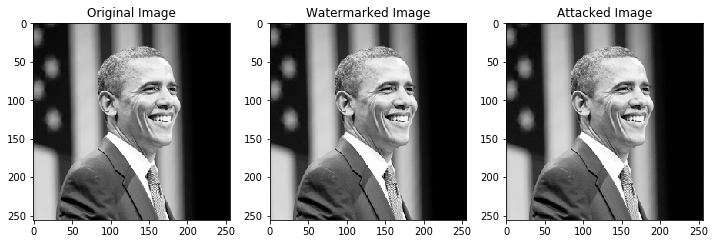

In [8]:
#comparison image display
f, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(img, cmap="Greys_r")
ax[1].imshow(y, cmap="Greys_r")
ax[2].imshow(v, cmap="Greys_r")
ax[0].set_title("Original Image")
ax[1].set_title("Watermarked Image")
ax[2].set_title("Attacked Image")

From the display, we cannot see any noticeable (according to the human eye) difference between any of the images. This makes sense since the watermarked image only altered the pixel values by 1, and the AWGN values are all centered around 0, making the impact small as well.

In [9]:
#extract estimated watermark from marked image v
w_nonblind = v-img
p_nonblind = np.sum(np.multiply(w_nonblind, w_))/(w_.shape[0]*w_.shape[1]/2) #account for N/2

In [10]:
p_nonblind

1.0016671597535913

In [11]:
#determine the local mean, let's use 4x4
from scipy import ndimage
v_ = ndimage.uniform_filter(v, size=4)

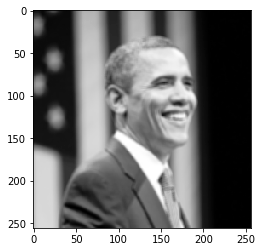

In [12]:
plt.imshow(v_, cmap="Greys_r")

We can assume that `v<hat> = x` because v is the attacked image `v = x + w_ + z` but since we do not know either the watermark `w_` or the noise `z`, the local_mean acts sort of as a denoising where we attempt to remove some of the qualities of `w_ + z`. This applies since the noise z is gaussian.

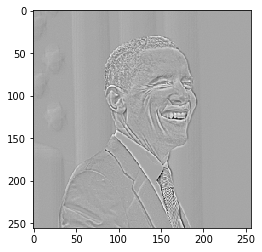

In [13]:
#given only the marked image v, blindly estimate w_blind
w_blind = v - v_
plt.imshow(w_blind, cmap="Greys_r")

In [14]:
#determine linear correlation between original w_ and w_blind
p_blind = np.sum(np.multiply(w_blind, w_))/(w_.shape[0]*w_.shape[1]/2) #account for N/2 here
p_blind

0.9427922286603012

In [15]:
#our linear correlations
print("Pblind: ", p_blind)
print("Pnonblind: ", p_nonblind)
print("Difference: ", p_nonblind-p_blind)

Pblind:  0.9427922286603012
Pnonblind:  1.0016671597535913
Difference:  0.05887493109329012


Here we can see that if we have access or knowledge to the original image x, the estimation for the watermark is very accurate. However, even in the case where we do not have access to the original image x (in the blind case) we can still estimate the watermark under the current setup with some reasonable degree of accuracy.